In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df=pd.read_csv('kmeans_income.csv')

In [4]:
df.shape

(22, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [7]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


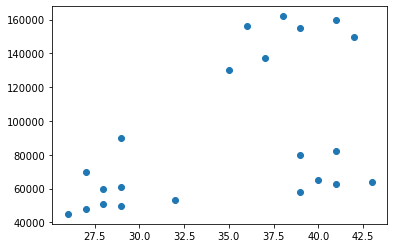

In [8]:
plt.scatter(df.Age,df['Income($)'])

In [9]:
from sklearn.cluster import KMeans

In [10]:
x=df.iloc[:,1:]


In [11]:
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [12]:
# Find the K values Using Elbow Methods
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)
    

In [13]:
wcss

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 231967084.46190482,
 177967003.7952381,
 128133608.44999997,
 96300255.03333335,
 68133457.7]

Text(0, 0.5, 'WCSS')

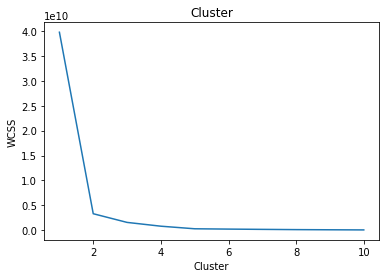

In [16]:
plt.title('Cluster')
plt.plot(range(1,11),wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')

In [29]:
import plotly.graph_objects as go
import plotly.express as px


In [33]:
px.line(range(1,11),wcss,labels={'x':'wcss','y':'Cluster'},title='Clusters')

In [84]:
kmeans=KMeans(n_clusters=2)


In [85]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [86]:
cluster=kmeans.predict(df[['Age','Income($)']])

In [87]:
df['Cluster']=cluster

In [88]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

In [89]:
kmeans.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

In [90]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1['Age'],y=df1['Income($)'],mode = 'markers'))
fig.add_trace(go.Scatter(x=df2['Age'],y=df2['Income($)'],mode = 'markers'))
fig.add_trace(go.Scatter(x=df3['Age'],y=df3['Income($)'],mode = 'markers'))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],mode='markers'))